In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 0. 데이터 세트 로드

* 총 개수: 127,409

In [2]:
DATA_PATH = "../data"

In [3]:
emotion_df = pd.read_csv(os.path.join(DATA_PATH, "sentimental_analysis.csv"))
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127409 entries, 0 to 127408
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   cat1      127409 non-null  object
 1   cat2      127409 non-null  object
 2   sentence  127409 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB


# 1. 감정대분류-감정소분류

### 감정대분류에 따른 발화 수

Text(0.5, 1.0, '감정 대분류 별 발화 수')

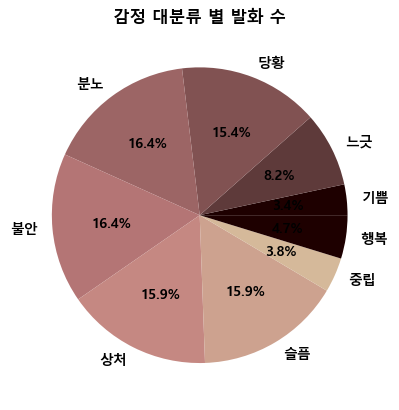

In [7]:
count_by_emotion_big_type = emotion_df.groupby(['cat1']).size()
colors = plt.cm.summer([0, 20, 40, 60, 80, 100, 120, 140])

plt.pie(count_by_emotion_big_type, labels=count_by_emotion_big_type.keys(), colors=colors, autopct="%.1f%%", textprops={'color': 'black', 'weight': 'bold'})
plt.title("감정 대분류 별 발화 수", fontweight='bold')

### 감정대분류, 감정소분류에 따른 발화 수